In [1]:
from PIL import Image
import matplotlib.pyplot as plt 
import cv2
import numpy as np 

## Open image


- Display ảnh từ file path ra ngoài notebook

In [5]:
img_path = 'img.png'
img = cv2.imread(img_path)
type(img)

numpy.ndarray

In [2]:
# hiển thị ảnh ra màn hình 
def display(img_path: str, dpi = 80):
    # đọc ảnh từ file 
    img = plt.imread(img_path)

    # lấy chiều cao, chiều rộng của ảnh 
    height, width, = img.shape[0], img.shape[1]

    figsize = (height / float(dpi), width / float(dpi))

    fig, ax = plt.subplots(figsize = figsize)

    ax.axis("off")
    ax.imshow(img, cmap = 'gray')

    plt.show()

In [3]:
def display_without_path(img, dpi = 80): 

    
    # lấy chiều cao, chiều rộng của ảnh 
    height, width, = img.shape[0], img.shape[1]

    figsize = (height / float(dpi), width / float(dpi))

    fig, ax = plt.subplots(figsize = figsize)

    ax.axis("off")
    ax.imshow(img, cmap = 'gray')

    plt.show()

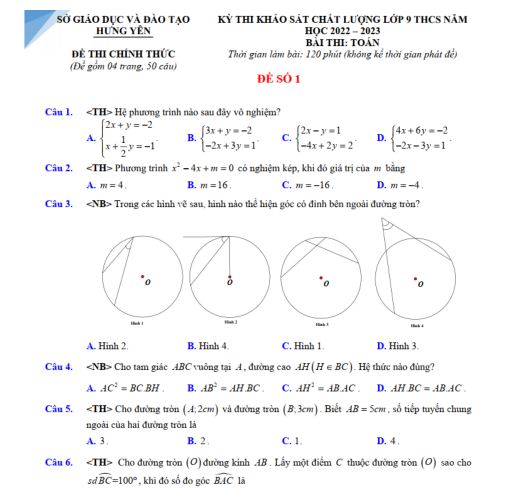

In [32]:
display(img_path, dpi = 120)

## Phản chiếu lại ảnh 

In [33]:
# đảo ngược màu của ảnh thông qua phép nhân not 

inverted_img = cv2.bitwise_not(img)
cv2.imwrite('img_inverted.png', inverted_img)

True

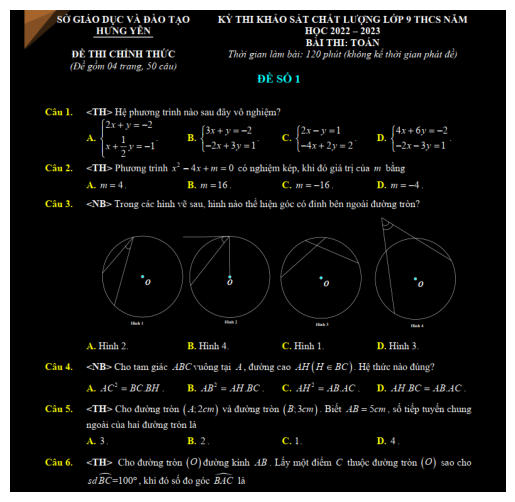

In [34]:
display('img_inverted.png', dpi=120)

In [35]:
# làm ảnh chuyển màu grayscale 
def grayscale(img): 
    result = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("img_grayscale.png", result)
    


In [36]:
grayscale(img)

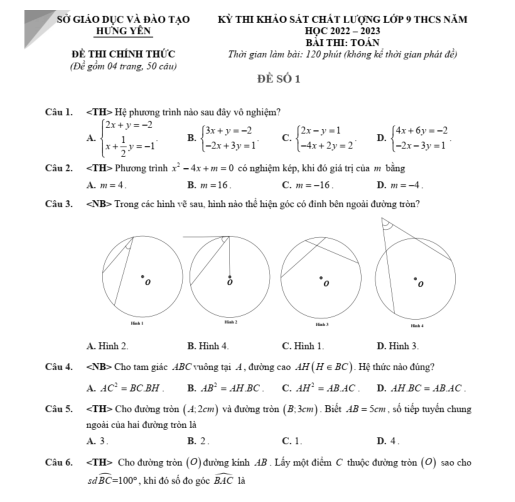

In [38]:
display('img_grayscale.png', 120)

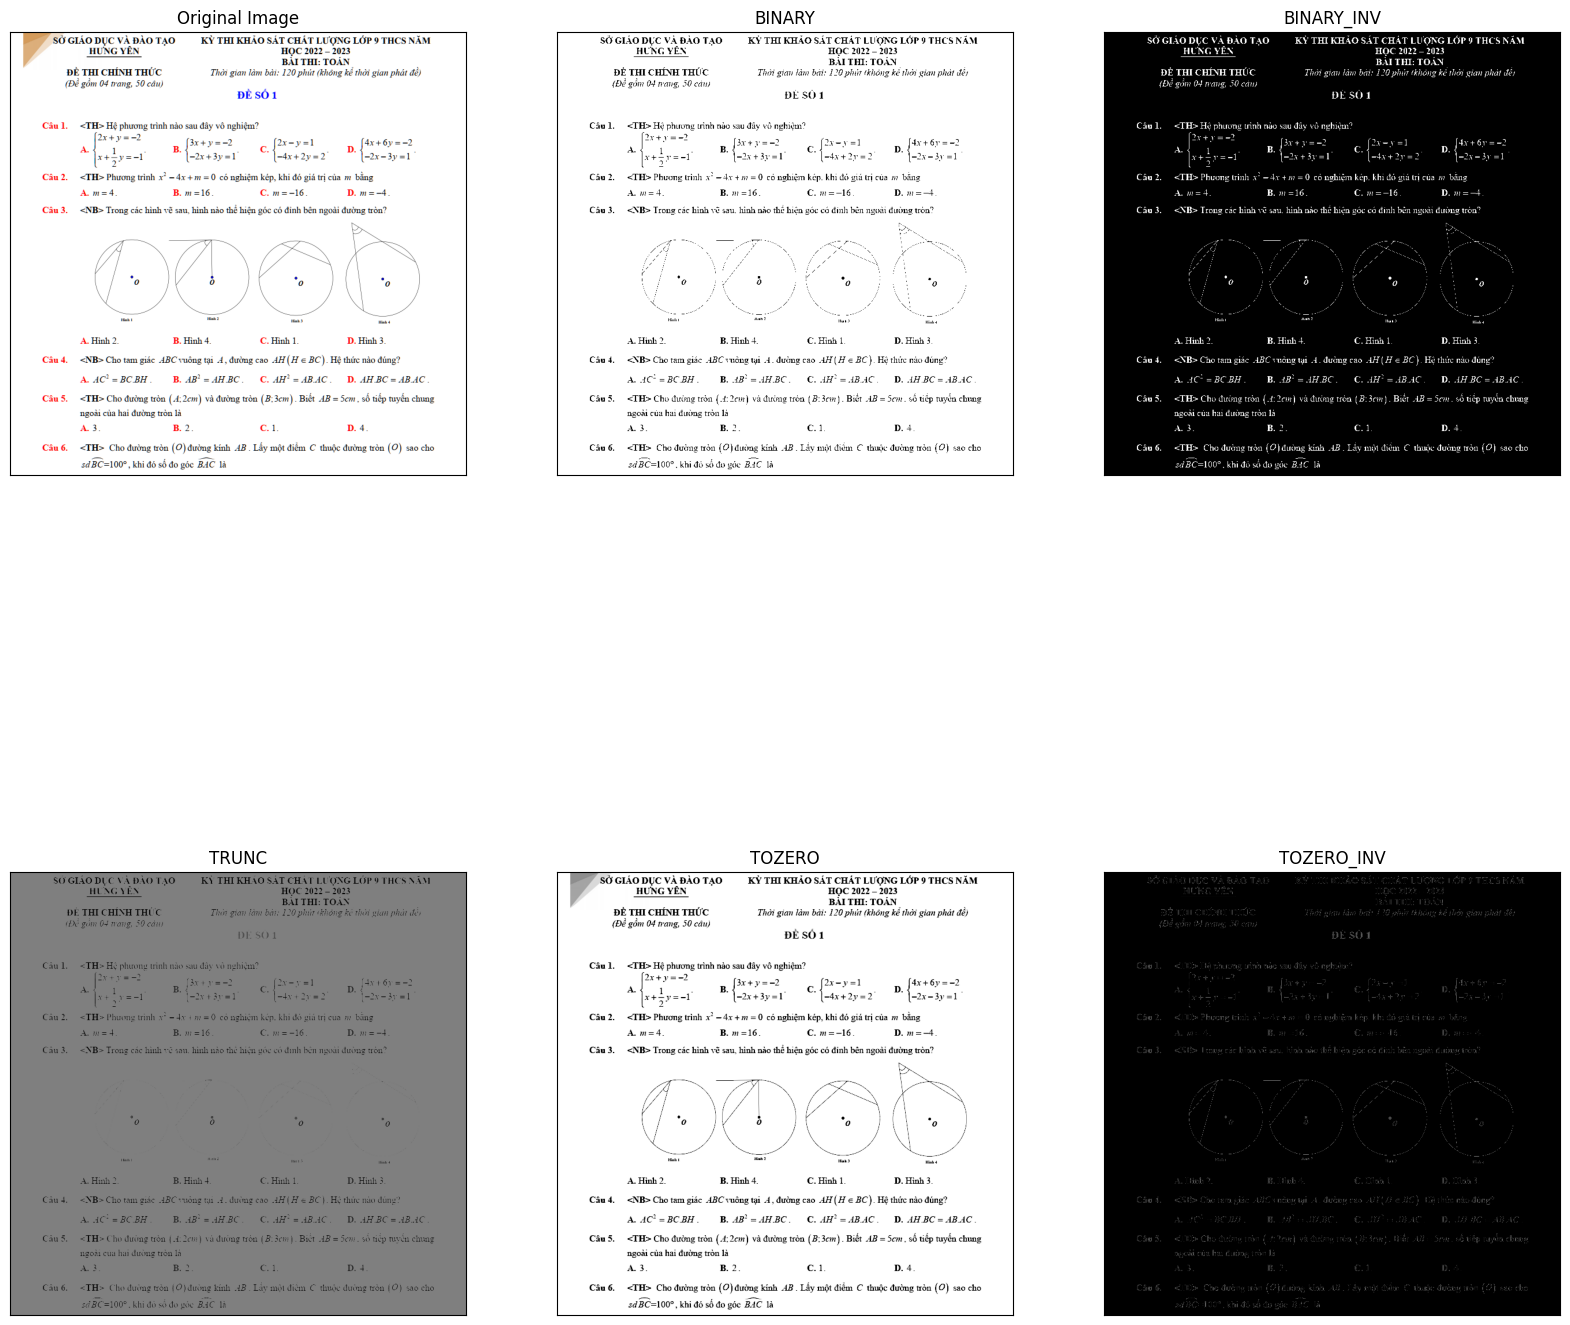

In [40]:
# sử dụng threshold để làm tăng cường độ nét, tương phản giữa những ảnh đen trắng
# tham khảo : https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
# If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.
'''
The first argument is the source image, which should be a grayscale image. 
The second argument is the threshold value which is used to classify the pixel values. 
The third argument is the maximum value which is assigned to pixel values exceeding the threshold. 

'''
img_grey = cv2.imread('img_grayscale.png')

ret, threshold1 = cv2.threshold(img_grey, 127, 255, cv2.THRESH_BINARY)
ret, threshold2 = cv2.threshold(img_grey, 127, 255, cv2.THRESH_BINARY_INV)
ret, threshold3 = cv2.threshold(img_grey, 127, 255, cv2.THRESH_TRUNC)
ret, threshold4  = cv2.threshold(img_grey, 127, 255, cv2.THRESH_TOZERO)
ret, threshold5 = cv2.threshold(img_grey, 127, 255, cv2.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, threshold1, threshold2, threshold3, threshold4, threshold5]

plt.figure(figsize=(20, 20))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


## Xoá noise 

In [44]:
# xóa một phần noise khỏi ảnh 
def remove_noise(img): 

    kernel = np.ones((1, 1), np.int8)
    img = cv2.dilate(img, kernel, iterations = 1)
    kernel = np.ones((1, 1), np.int8)
    img = cv2.erode(img, kernel, iterations = 1)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    img = cv2.medianBlur(img, 3)
    
    return img 




In [45]:
img = cv2.imread('noise.png')

no_noise = remove_noise(img)
cv2.imwrite('no_noise.png', no_noise)


True

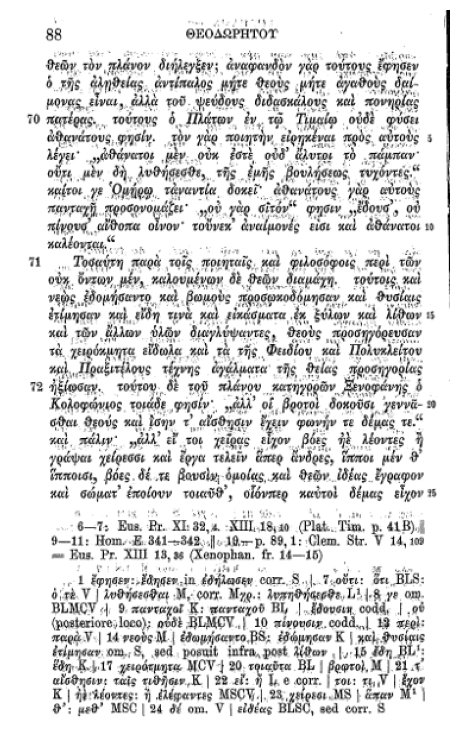

In [49]:
display('noise.png', dpi = 40)

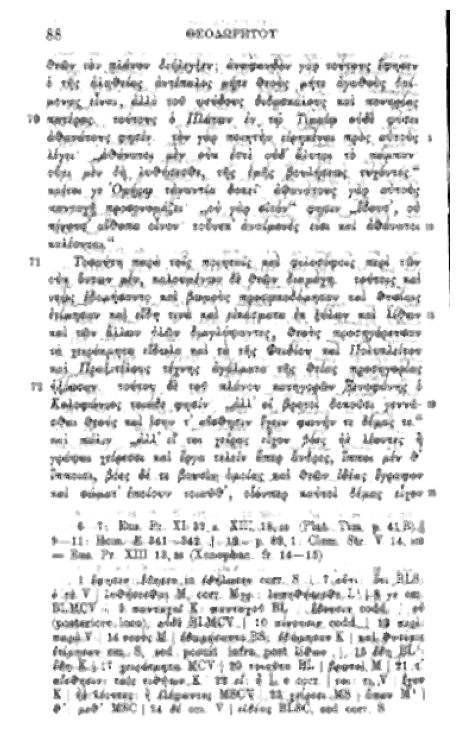

In [60]:
ret, threshold = cv2.threshold(no_noise, 140, 255, cv2.THRESH_BINARY)

display_without_path(no_noise, 40)

# Morphological Operations
- Là một tập hợp các phép toán tử xử lý ảnh dựa trên hình dạng của nó (áp dụng với ảnh nhị phân). Các toán tử này dùng để: 
    1. khử noise của ảnh
    2. tách đối tượng ra khỏi ảnh, kết nối các đối tượng của ảnh 
     

## Dilation 
- Phép toán sử dụng convol với ảnh A và một kernel B (có thể là hình tùy ý, kích thước tùy ý). Kernel B định nghĩa một điểm được là archor point - thường ở giữa kernel 
- Kernel B được dịch chuyển trên ảnh A, và tại mỗi vị trí dịch chuyển, tìm giá trị lớn nhất của vùng áp dụng B và thay archor point bằng giá  trị lớn nhất đó 
- Các vùng ảnh có giá trị lớn (màu trắng) được thay thế và mở rộng ra theo mỗi lần thực hiện duyệt qua (iteration) -> giúp làm cho nét chữ trở nên dày hơn

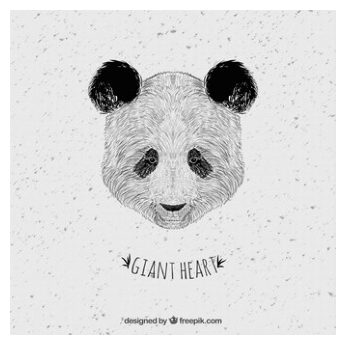

In [10]:
example_img = cv2.imread("panda.jpg", cv2.IMREAD_GRAYSCALE)

display_without_path(example_img)

In [17]:
def thick_font(img, iterations = 1): 

    kernel = np.ones((2, 2,), np.int8)
    img = cv2.dilate(img, kernel, iterations= iterations )

    return img 

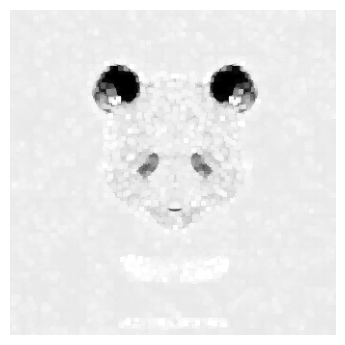

In [18]:
thick_example = thick_font(example_img, iterations = 4)
display_without_path(thick_example)

## Erosion 
- Phép toán ngược lại với phép toán dilation ở trên, nó làm thu hẹp các vùng trắng lại (làm nhỏ giá trị lân cận đi )

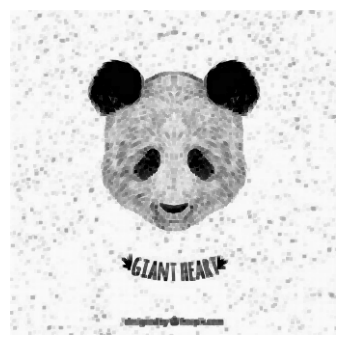

In [26]:
def thin_font(img, iterations = 1): 
    
    kernel = np.ones((2, 2), np.int8)
    img = cv2.erode(img, kernel, iterations = iterations )

    return img 

thin_example = thin_font(example_img, iterations = 2)
display_without_path(thin_example)

# Xoay ảnh 

In [6]:


def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    # gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(newImage, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)
    display_without_path(dilate)
    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)
    
    display_without_path(newImage)
    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    print(angle)
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center,  90 - angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1 * angle)

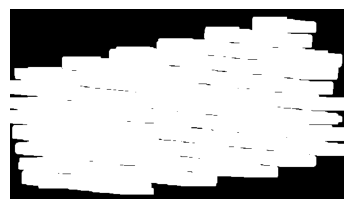

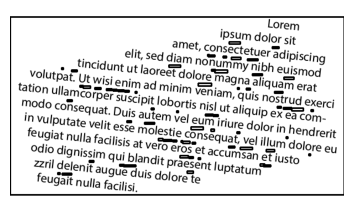

63
81.8698959350586


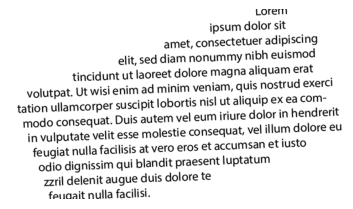

In [7]:
rotated_img = cv2.imread("rotated-text.png", cv2.IMREAD_GRAYSCALE)

new_img = deskew(rotated_img)
display_without_path(new_img)